In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'

# Load individual anatomy

In [4]:
fly_folders = [os.path.join(root_directory,x) for x in os.listdir(root_directory) if 'fly' in x]
bbb.sort_nicely(fly_folders)
fly_folders = fly_folders[::-1]
anatomy = {}
for fly in fly_folders:
    anat_folders = []
    anat_folders = [os.path.join(fly,x) for x in os.listdir(fly) if 'anat' in x]
    if len(anat_folders) > 0:
        for anat_folder in anat_folders:
            fly_num = os.path.split(fly)[-1]
            anat_num = os.path.split(anat_folder)[-1]
            this_anat = '{},{}'.format(fly_num, anat_num)
            if this_anat == 'fly_12,anat_0':
                anatomy[this_anat] = bbb.load_numpy_brain(os.path.join(anat_folder, 'anat_mean.nii'))
                print('Loaded SPECIAL {}'.format(this_anat))
                continue
            try:
                anatomy[this_anat] = bbb.load_numpy_brain(os.path.join(anat_folder, 'anatomy_channel_1.nii'))
                print('Loaded {}'.format(this_anat))
            except:
                print('failed to load anatomy_channel_1.nii: {}'.format(this_anat))
                try:
                    anatomy[this_anat] = bbb.load_numpy_brain(os.path.join(anat_folder, 'anatomy.nii'))
                except:
                    print('failed to load anatomy.nii: {}'.format(this_anat))


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 331.56 ms
Loaded fly_72,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 317.19 ms
Loaded fly_71,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 382.41 ms
Loaded fly_70,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 379.39 ms
Loaded fly_69,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 359.88 ms
Loaded fly_68,anat_1

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 476.21 ms
Loaded fly_68,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 326.87 ms
Loaded fly_67,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 318.30 ms
Loaded fly_66,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 276.07 ms
Loaded fly_65,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 239.02 ms
Loaded fly_64,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 276.36 ms
Loaded fly_63,anat_1

~~ load_numpy_brain ~~
load_num

failed to load anatomy_channel_1.nii: fly_5,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 517.71 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_4,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 365.24 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_3,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 489.50 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_2,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 423.35 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_1,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 512.27 ms


In [5]:
for i,anat in enumerate(anatomy):
    print('{}, {}'.format(i, anat))

0, fly_72,anat_0
1, fly_71,anat_0
2, fly_70,anat_0
3, fly_69,anat_0
4, fly_68,anat_1
5, fly_68,anat_0
6, fly_67,anat_0
7, fly_66,anat_0
8, fly_65,anat_0
9, fly_64,anat_0
10, fly_63,anat_1
11, fly_63,anat_0
12, fly_61,anat_0
13, fly_60,anat_0
14, fly_59,anat_0
15, fly_58,anat_0
16, fly_57,anat_1
17, fly_57,anat_0
18, fly_56,anat_1
19, fly_56,anat_0
20, fly_56,anat_2
21, fly_55,anat_0
22, fly_54,anat_0
23, fly_53,anat_0
24, fly_52,anat_0
25, fly_51,anat_0
26, fly_49,anat_0
27, fly_48,anat_0
28, fly_47,anat_0
29, fly_46,anat_0
30, fly_45,anat_0
31, fly_44,anat_0
32, fly_43,anat_0
33, fly_42,anat_0
34, fly_40,anat_0
35, fly_39,anat_1
36, fly_39,anat_0
37, fly_38,anat_1_1
38, fly_38,anat_0_1
39, fly_38,anat_0_0
40, fly_38,anat_1_0
41, fly_37,anat_0
42, fly_37,anat_2
43, fly_36,anat_0
44, fly_35,anat_0
45, fly_34,anat_0
46, fly_33,anat_1
47, fly_33,anat_0
48, fly_30,anat_1
49, fly_30,anat_0
50, fly_29,anat_1
51, fly_29,anat_0
52, fly_28,anat_0
53, fly_27,anat_0
54, fly_26,anat_0
55, fly_25,a

### Remove bad brains and non-central brains etc

In [6]:
to_remove = ['fly_64,anat_0',
             'fly_55,anat_0',
             'fly_46,anat_0',
             'fly_45,anat_0',
             'fly_44,anat_0',
             'fly_43,anat_0',
             'fly_40,anat_0',
             'fly_39,anat_0',
             'fly_39,anat_1',
             'fly_38,anat_0_0',
             'fly_38,anat_0_1',
             'fly_38,anat_1_0',
             'fly_38,anat_1_1',
             'fly_37,anat_2',
             'fly_36,anat_0',
             'fly_35,anat_0',
             'fly_34,anat_0',
             'fly_33,anat_0',
             'fly_30,anat_1',
             'fly_29,anat_1',
             'fly_20,anat_0',
             'fly_18,anat_0',
             'fly_16,anat_0',
             'fly_12,anat_0',
             'fly_10,anat_0',
             'fly_9,anat_0',
             'fly_8,anat_0']

In [7]:
for k in to_remove:
    anatomy.pop(k, None)

In [8]:
anatomy.keys()

dict_keys(['fly_72,anat_0', 'fly_71,anat_0', 'fly_70,anat_0', 'fly_69,anat_0', 'fly_68,anat_1', 'fly_68,anat_0', 'fly_67,anat_0', 'fly_66,anat_0', 'fly_65,anat_0', 'fly_63,anat_1', 'fly_63,anat_0', 'fly_61,anat_0', 'fly_60,anat_0', 'fly_59,anat_0', 'fly_58,anat_0', 'fly_57,anat_1', 'fly_57,anat_0', 'fly_56,anat_1', 'fly_56,anat_0', 'fly_56,anat_2', 'fly_54,anat_0', 'fly_53,anat_0', 'fly_52,anat_0', 'fly_51,anat_0', 'fly_49,anat_0', 'fly_48,anat_0', 'fly_47,anat_0', 'fly_42,anat_0', 'fly_37,anat_0', 'fly_33,anat_1', 'fly_30,anat_0', 'fly_29,anat_0', 'fly_28,anat_0', 'fly_27,anat_0', 'fly_26,anat_0', 'fly_25,anat_0', 'fly_24,anat_0', 'fly_23,anat_0', 'fly_22,anat_0', 'fly_21,anat_0', 'fly_19,anat_0', 'fly_17,anat_0', 'fly_15,anat_0', 'fly_14,anat_0', 'fly_13,anat_0', 'fly_7,anat_0', 'fly_6,anat_0', 'fly_5,anat_0', 'fly_4,anat_0', 'fly_3,anat_0', 'fly_2,anat_0', 'fly_1,anat_0'])

### Rotate some brains to match

In [9]:
to_rotate = ['fly_7,anat_0', 'fly_2,anat_0', 'fly_1,anat_0']
for k in to_rotate:
    anatomy[k] = np.swapaxes(anatomy[k],0,1)

### Flip for mirror collection

In [16]:
for i in anatomy:
    anatomy[i] = anatomy[i][::-1,:,:]

### Create Ants brains with correct pixel sizes

In [18]:
anatomy_ants = {}
for anat in anatomy:
    fly_num, anat_num = anat.split(',')
    anatomy_xml = os.path.join(root_directory, fly_num, anat_num, 'anatomy.xml')
    anatomy_ants[anat] = ants.from_numpy(anatomy[anat])
    anatomy_ants[anat].set_spacing(bbb.get_resolution(anatomy_xml))
    print('DONE: {}'.format(anat))

DONE: fly_72,anat_0
DONE: fly_71,anat_0
DONE: fly_70,anat_0
DONE: fly_69,anat_0
DONE: fly_68,anat_1
DONE: fly_68,anat_0
DONE: fly_67,anat_0
DONE: fly_66,anat_0
DONE: fly_65,anat_0
DONE: fly_63,anat_1
DONE: fly_63,anat_0
DONE: fly_61,anat_0
DONE: fly_60,anat_0
DONE: fly_59,anat_0
DONE: fly_58,anat_0
DONE: fly_57,anat_1
DONE: fly_57,anat_0
DONE: fly_56,anat_1
DONE: fly_56,anat_0
DONE: fly_56,anat_2
DONE: fly_54,anat_0
DONE: fly_53,anat_0
DONE: fly_52,anat_0
DONE: fly_51,anat_0
DONE: fly_49,anat_0
DONE: fly_48,anat_0
DONE: fly_47,anat_0
DONE: fly_42,anat_0
DONE: fly_37,anat_0
DONE: fly_33,anat_1
DONE: fly_30,anat_0
DONE: fly_29,anat_0
DONE: fly_28,anat_0
DONE: fly_27,anat_0
DONE: fly_26,anat_0
DONE: fly_25,anat_0
DONE: fly_24,anat_0
DONE: fly_23,anat_0
DONE: fly_22,anat_0
DONE: fly_21,anat_0
DONE: fly_19,anat_0
DONE: fly_17,anat_0
DONE: fly_15,anat_0
DONE: fly_14,anat_0
DONE: fly_13,anat_0
DONE: fly_7,anat_0
DONE: fly_6,anat_0
DONE: fly_5,anat_0
DONE: fly_4,anat_0
DONE: fly_3,anat_0
DONE:

In [19]:
anatomy_ants

{'fly_1,anat_0': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (512, 352, 267)
 	 Spacing    : (0.7253, 0.7253, 1.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.], 'fly_13,anat_0': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (508, 260, 291)
 	 Spacing    : (1.088, 1.088, 1.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.], 'fly_14,anat_0': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (512, 300, 296)
 	 Spacing    : (1.088, 1.088, 1.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.], 'fly_15,anat_0': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (516, 314, 241)
 	 Spacing    : (0.768, 0.768, 1.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.], 'fly_17,anat_0': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1

In [13]:
os.mkdir(os.path.join(root_directory, '20191204_anatomy_collection'))

In [20]:
for anat in anatomy:
    fly_ = anat.split(',')[0]
    anat_ = anat.split(',')[-1]
    flynum = fly_.split('_')[-1]
    anatnum = anat_.split('_')[-1]
    name = 'f{}a{}m.nii'.format(flynum, anatnum)
    save_file = os.path.join(root_directory, '20191204_anatomy_collection', name)
    ants.image_write(anatomy_ants[anat], save_file)

In [14]:
for anat in anatomy:
    print(anat)

fly_72,anat_0
fly_71,anat_0
fly_70,anat_0
fly_69,anat_0
fly_68,anat_1
fly_68,anat_0
fly_67,anat_0
fly_66,anat_0
fly_65,anat_0
fly_63,anat_1
fly_63,anat_0
fly_61,anat_0
fly_60,anat_0
fly_59,anat_0
fly_58,anat_0
fly_57,anat_1
fly_57,anat_0
fly_56,anat_1
fly_56,anat_0
fly_56,anat_2
fly_54,anat_0
fly_53,anat_0
fly_52,anat_0
fly_51,anat_0
fly_49,anat_0
fly_48,anat_0
fly_47,anat_0
fly_42,anat_0
fly_37,anat_0
fly_33,anat_1
fly_30,anat_0
fly_29,anat_0
fly_28,anat_0
fly_27,anat_0
fly_26,anat_0
fly_25,anat_0
fly_24,anat_0
fly_23,anat_0
fly_22,anat_0
fly_21,anat_0
fly_19,anat_0
fly_17,anat_0
fly_15,anat_0
fly_14,anat_0
fly_13,anat_0
fly_7,anat_0
fly_6,anat_0
fly_5,anat_0
fly_4,anat_0
fly_3,anat_0
fly_2,anat_0
fly_1,anat_0


In [ ]:
ants.image_write(anatomy, save_file)

# Load Template

In [5]:
template_file = os.path.join('/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190224_anatomy_central', 'meanbrain1', 'JFRCtemplate2010.nii')
template = bbb.load_numpy_brain(template_file)


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 629.58 ms


In [6]:
# Flip Z-axis
template = template[:,:,::-1]

In [7]:
# Cut off optic lobes
template = template[200:800,:,:]

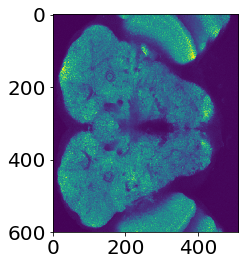

In [8]:
plt.imshow(template[:,:,80])

In [9]:
# Set resolution
template = ants.from_numpy(template)
ants.set_spacing(template, (0.622, 0.622, 0.622))

In [9]:
template

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (600, 512, 218)
	 Spacing    : (0.622, 0.622, 0.622)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [10]:
save_file = os.path.join(root_directory, '20191204_anatomy_collection', 'yes.nii')
ants.image_write(template, save_file)